# <font color='red'>Examen Data Science</font>

![title](https://github.com/martinezbrenda/Test_Ingreso_Santander/blob/main/img/st.jpeg?raw=1)

Escribir su Nombre y Apellido a continuación

Nombre:
Apellido:

# Sección A - Desafíos Técnicos

## <font color='red'>1 -Python</font>

### py-1) Vectores, Clases y Objetos

Desarrollar una clase en python que, al instanciar, reciba un vector **weights** y que tenga la siguiente funcionalidad:


* Desarrollar el método **set_weights** que pueda sobrescribir los valores del atributo `weights`
* Desarrollar el método **dot** que permita multiplicar el vector `weigths` por un vector de entrada. (producto escalar)
* Desarrollar el método **predict** que utilice la salida del método dot y lo pasé por la función ReLu. <a href=https://es.wikipedia.org/wiki/Rectificador_(redes_neuronales)>Función Relu</a>  
* Desarrollar otra clase que herede el comportamiento de la clase anterior y que además:
  * Reciba un parametro adicional: `bias` (int64)
  * Redefina el método **dot** y al producto le sume el atributo `bias`

In [ ]:
import numpy as np
weights = np.array([-4,3,1,-2])

In [ ]:
# Escriba aquí su respuesta

### py-2) Unit test

Desarrollar un test unitario que permita evaluar los métodos de la clase base.

In [ ]:
# Escriba aquí su respuesta

## <font color='red'>2- SQL</font>

Para el siguiente ejercicio se tiene una base de datos que tiene el siguiente DER:

![title](https://github.com/martinezbrenda/Test_Ingreso_Santander/blob/main/img/img_der.png?raw=1)


* Persona (id) puede tener muchas Tarjetas (se relaciona a través de `id_titular`)
* Una Compra siempre es realizada con una única tarjeta
* (EXTRA) La tabla Compra posee un histórico de más de 10 años y varias decenas de millones de registros por lo que las consultas a esta entidad pueden tardar varios minutos si no están correctamente optimizadas.

### sql-1) Query

Obtener los número de tarjeta que no tengan consumos en el último mes pero que pertenecen a personas que hayan comprado al menos un total de $5000 en el último mes en los rubros (FARMACIA y SUPERMERCADOS) en conjunto. (Si es posible, tener en cuenta el punto EXTRA mencionado previamente).


In [ ]:
# Escriba aquí su respuesta

### sql-2) Explicar el resultado de la siguiente query

* ¿Qué se obtiene cómo resultado?
* ¿Quiénes son P1, P2 y P3?
* (EXTRA) Si supiera que la tabla persona se carga completa todos los días del año, cada día teniendo una foto guardada con una valor distinto dentro de una variable llamada partition_date. Por ej: uno puede consultar todos los ids de la fecha 2021-05-27 o de la fecha que quiera. ¿Cambiaría algo la siguiente query si quisiera obtener el mismo resultado para la última fecha disponible?


 <font color='blue'>**SELECT**</font> P1.dni,  <font color='red'>COUNT</font> ( <font color='red'>DISTINCT</font>  ( P2.id ) )\
<font color='blue'>**FROM** </font> Persona P1 \
<font color='blue'>**JOIN**</font> Persona P2 on P1.id_padre = P2.id \
<font color='blue'>**JOIN**</font>  Persona P3 on P2.id_padre = P3.id \
<font color='blue'>**WHERE**</font>  P3.sexo = 'MASCULINO' \
<font color='blue'>**GROUP BY**</font>  P1.dni

In [ ]:
# Escriba aquí su respuesta

# Sección B - Desafío Machine Learning

#### Enunciado Parte Práctica

El ejercicio consiste en realizar una clasificación de intención de compra online. Para ello se dispondrá de un dataset **online_shoppers_intention.csv** el cual consta de **12.330** registros y **18** columnas
* El target es la columnna **Revenue**

Para completar el desafío se deberá:
* Realizar un análisis exploratorio de los datos
* Explicar la elección del algoritmo utilizado
* Explicar los resultados obtenidos (Métricas)
* Explicar cuales son las variables que más afectan a la predicción.
* Contestar las siguientes preguntas:
  * *¿El modelo final elegido es bueno? Justificar*
  * *¿Existe overfitting o underfitting?*

⚠️**ACLARACIONES:**⚠️

- Se tendrá en cuenta la prolijidad del informe.
- Se tendrá en cuenta la legibilidad del código.
- De ser necesario, dejar asentado los supuestos utilizados por escrito.

## Analisis exploratorio de datos


In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, RandomizedSearchCV

### Primer aproach a los datos

In [275]:
## Lectura del data set y muestreo

df = pd.read_csv("https://raw.githubusercontent.com/martinezbrenda/Test_Ingreso_Santander/main/online_shoppers_intention.csv")
# Inspección rápida de las primeras filas, columnas y tamano
print("Total filas:", df.shape[0])
print("Total columnas:", df.shape[1])
df.head(6)

Total filas: 12330
Total columnas: 18


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False


In [276]:
# Estructura del DataFrame para ver tipos y cantidades

print("\nEstructura:")
print(df.info())

print("\nResumen estadistico")
print(df.describe())


Estructura:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficTy

Podemos observar que tenemos 4 tipos de variables que se reparten en 7 int 7 float 2 object y 2 bool.

,proportion
Revenue,
False,0.845255
True,0.154745


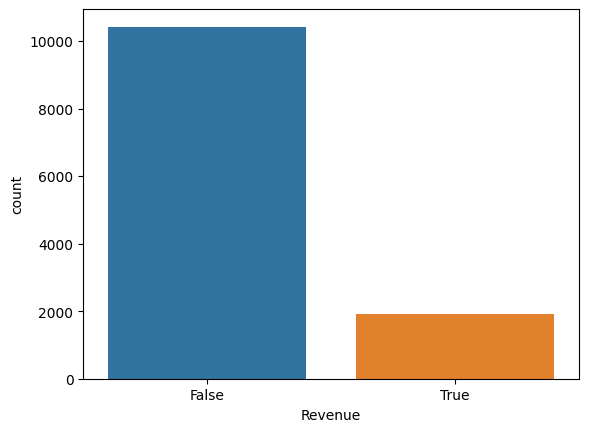

In [277]:
# Distribucion de la variable target

sns.countplot(x='Revenue', data=df, hue='Revenue', legend=False)
df['Revenue'].value_counts(normalize=True)

Se puede ver que el data set esta altamente desbalanceado, tendremos que analizar que metricas conviene utilizar para la evaluacion del modelo y conciderar un posible rebalanceo

### Tranformacion de variables
Luego de las observaciones realizadas anteriormente vamos a analizar como modificar ciertas columnas para estas puedan ser utilizadas. Estas son:


*   Weekend
*   VisitorType
*   Month
* Revenue




In [278]:
print(df['VisitorType'].unique())
df.VisitorType.value_counts()

['Returning_Visitor' 'New_Visitor' 'Other']


,count
VisitorType,
Returning_Visitor,10551
New_Visitor,1694
Other,85


Podemos observar que visitor type no es una variable binaria, pero debido a que la categoria "Other" tiene muy pocos registros, la eliminaremos y concideraremos unicamente si el visitante es nuevo o recurrente.

In [279]:
df['VisitorType'] = df['VisitorType'].apply( lambda x: x if x in ['Returning_Visitor', 'New_Visitor'] else 'New_Visitor')
df['VisitorType'] = df['VisitorType'].apply(lambda x: 0 if x == 'Returning_Visitor' else 1)
print(df['VisitorType'].unique())
df.VisitorType.value_counts()

[0 1]


,count
VisitorType,
0,10551
1,1779


Convertimos a las columnas Weekend y Revenue en int

In [280]:
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

Ahora modificaremos la columna Month para que deje de ser del tipo string.

In [281]:
print(df['Month'].unique()) # Tenemos que ver como este data set tiene los meses escritos porque si no el mapeo no va a funcionar y va a dejar la columna Month con valores en nulo
month_map = {
    'Feb': 2, 'Mar': 3, 'May': 5, 'June': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10,
    'Nov': 11, 'Dec': 12
}
df['Month'] = df['Month'].map(month_map)

['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']


In [282]:
df.TrafficType.value_counts()

,count
TrafficType,
2,3913
1,2451
3,2052
4,1069
13,738
10,450
6,444
8,343
5,260


Podemos observar que tenemos demasiados tipos de trafico y muchos de ellos ni quiera tienen una cantidad significativa de registros asociados. Ahora procederemos a buscar los 10 mas frecuentes (ya que son 10 las categorias que superan los 200 registros) y reemplazar a todos los que no pertenezcan a ese top por la categoria "Other"

In [283]:
top10= df.TrafficType.value_counts().index[:10]
df['TrafficType']= np.where(df['TrafficType'].isin(top10), df['TrafficType'], 0)
df.TrafficType.value_counts()

,count
TrafficType,
2,3913
1,2451
3,2052
4,1069
13,738
10,450
6,444
0,363
8,343


In [284]:
df.Browser.value_counts()

,count
Browser,
2,7961
1,2462
4,736
5,467
6,174
10,163
8,135
3,105
13,61


De la misma manera que en el caso anterior, vamos a realizar lo mismo con la variable Browser

In [285]:
top5 = df['Browser'].value_counts().index[:5]
df['Browser'] = np.where(df['Browser'].isin(top5), df['Browser'], 0)
df.Browser.value_counts()

,count
Browser,
2,7961
1,2462
4,736
0,530
5,467
6,174


In [286]:
df.OperatingSystems.value_counts()

,count
OperatingSystems,
2,6601
1,2585
3,2555
4,478
8,79
6,19
7,7
5,6


In [287]:
top3 = df['OperatingSystems'].value_counts().index[:3]
df['OperatingSystems'] = np.where(df['OperatingSystems'].isin(top3), df['OperatingSystems'], 0)
df.OperatingSystems.value_counts()

,count
OperatingSystems,
2,6601
1,2585
3,2555
0,589


Al contabilizar el contenido del resto de las columnas no concideramos necesario realizar modificaciones en este momento ahora verificaremos las modifcaciones realizadas

In [288]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,0,1,9,3,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,0,1,4,0,1,0


### Busca de valores faltantes o atipicos
Analizaremos el data set en busca de nulos y outliers

In [289]:
# Valores nulos
df.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


Observarmos que no se presentan valores nulos lo cual a priori puede parecer extrano pero una vez avanzado el EDA comprendemos que por la naturaleza del problema podria ser veridico

Analizamos las distribuciones de las variables

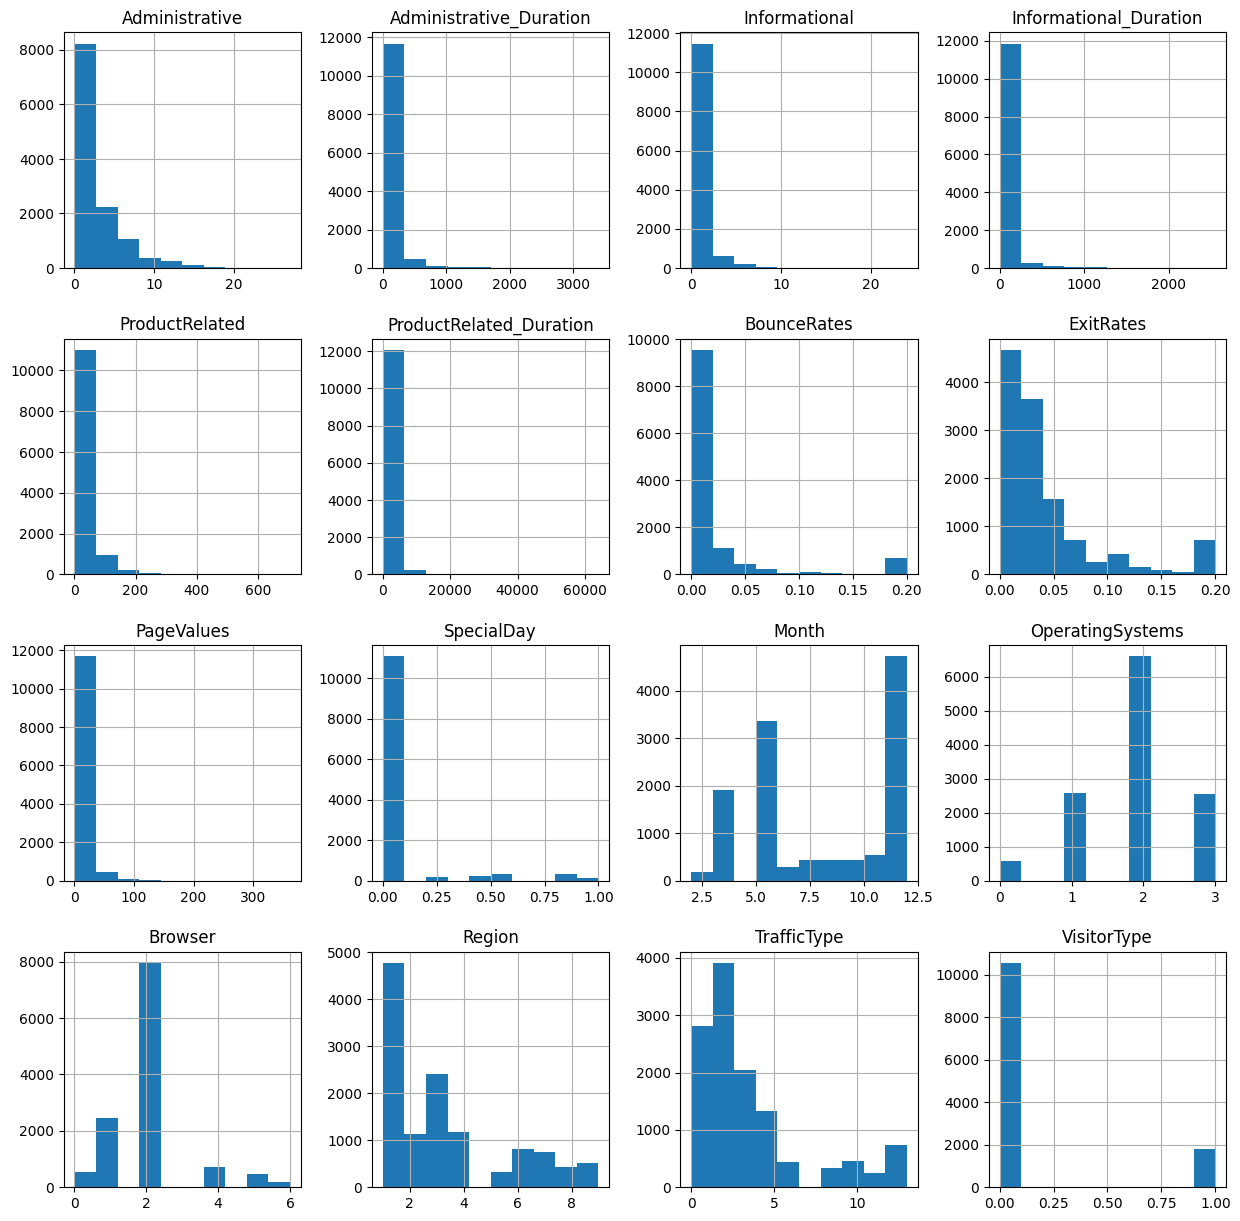

In [290]:
df.iloc[:,:-2].hist(figsize=(15,15));

Podemos ver que se presentan outliers, procedemos a identificarlos

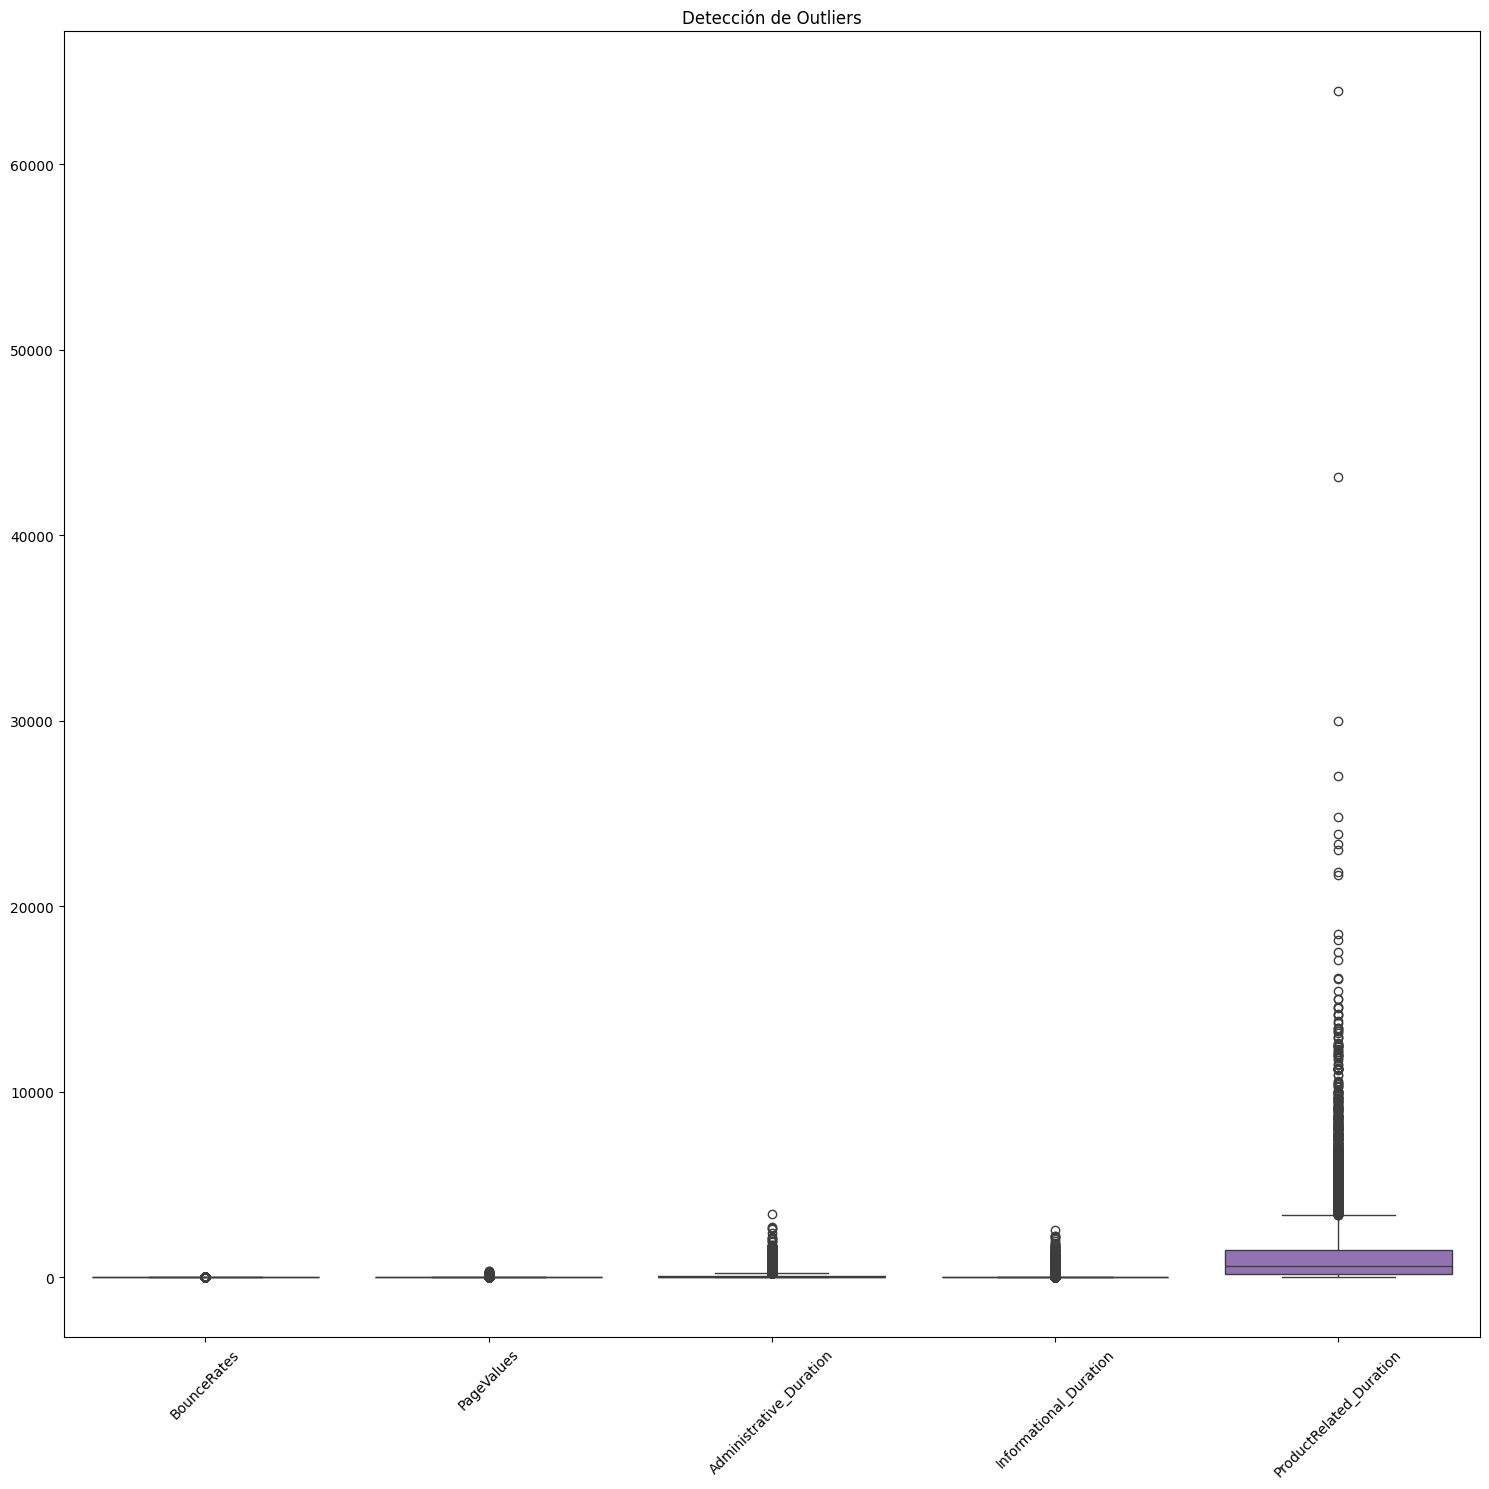

In [291]:
cols_outliers = ['BounceRates', 'PageValues', 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']
plt.figure(figsize=(15, 15))
sns.boxplot(data=df[cols_outliers])
plt.title('Detección de Outliers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [292]:
outlier_summary = {}
# Solo columnas int64 o float64, tuve que agregar la condicion df[col].nunique() > 2 porque no filtraba los varoles booleanos
numeric_cols = [col for col in df.columns if df[col].dtype in [np.int64, np.float64] and df[col].nunique() > 2]

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_summary[col] = outliers

outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Cantidad de outliers'])
outlier_df = outlier_df.sort_values(by='Cantidad de outliers', ascending=False)

outlier_df

,Cantidad de outliers
Browser,4369
PageValues,2730
Informational,2631
Informational_Duration,2405
TrafficType,1778
BounceRates,1551
SpecialDay,1251
Administrative_Duration,1172
ExitRates,1099
ProductRelated,987


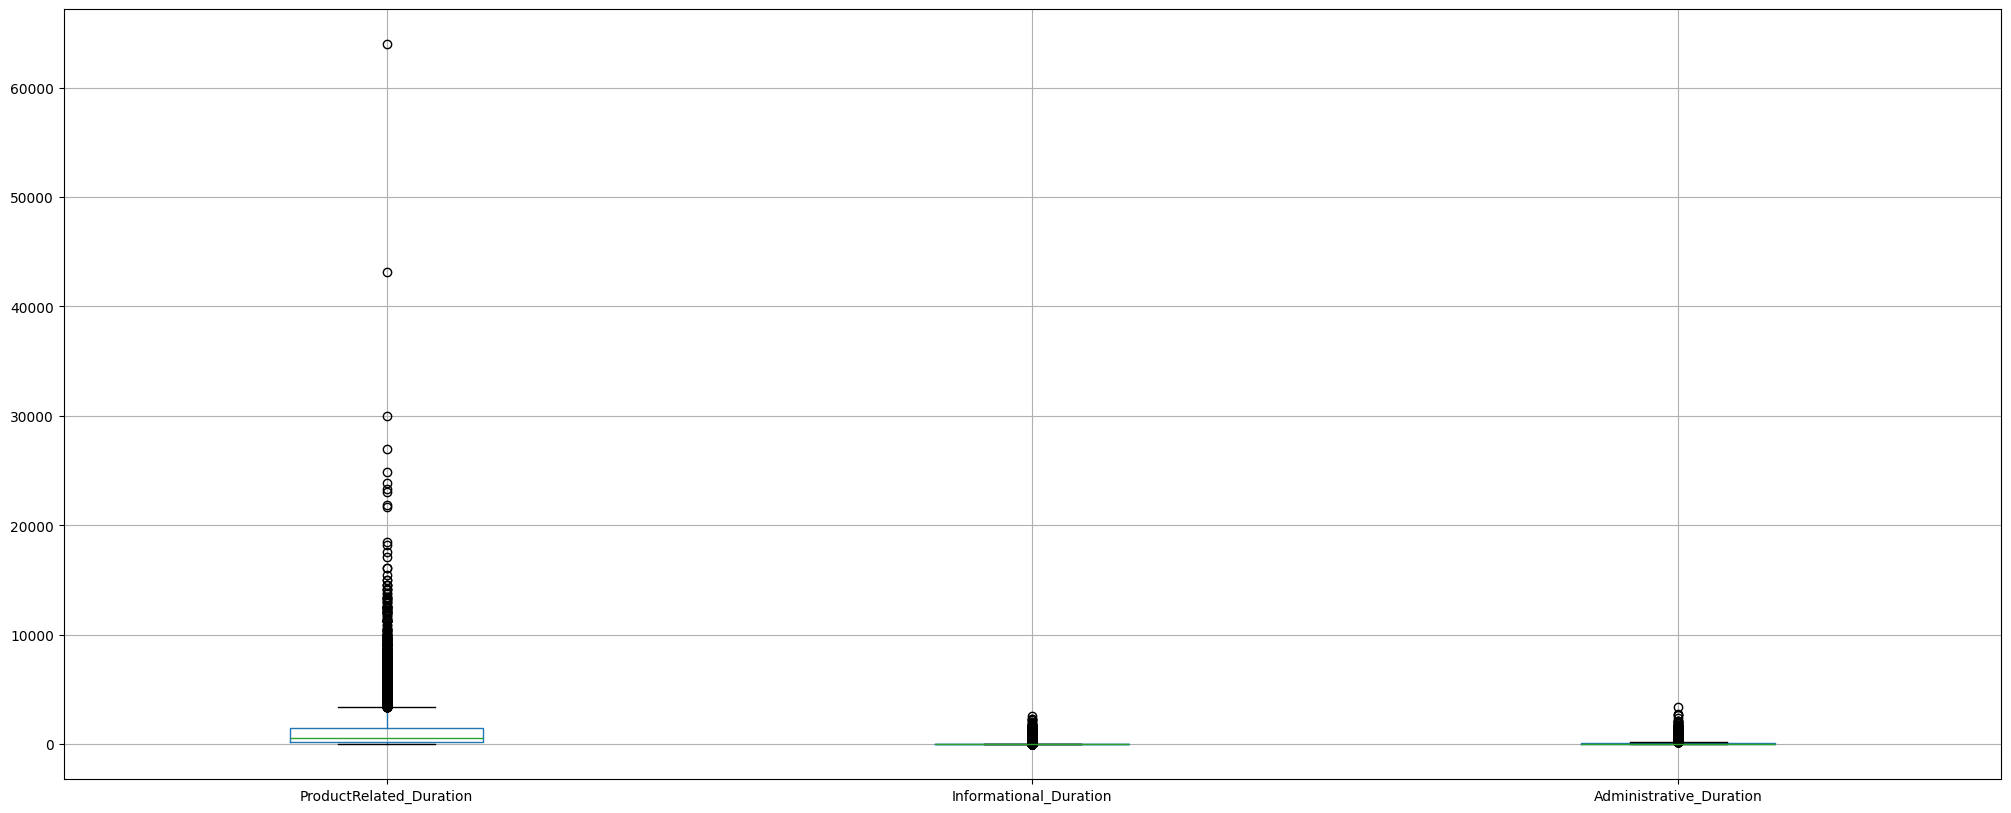

In [293]:
df[['ProductRelated_Duration', 'Informational_Duration', "Administrative_Duration"]].boxplot(figsize=(25,10));

Segun lo que observamos
* PageValues: Fuerte asimetría, lo que puede ser común porque tiene muchos ceros (personas que ni llegan al checkout del carrito de compras) y algunos valores muy altos (que reflejan un interes en la compra). No conviene eliminar estos outliers, ya que son datos relevantes.

* BounceRates y ExitRates: Hay algunos valores extremos, pero estos porcentajes extremos son relevantes para el comportamiento del usuario y nos arriesgamos a perder ejemplos significativos.

* SpecialDay: Esta columna ya está muy dispersa por diseño (días especiales codificados en 0-1).

* VisitorType, Weekend, Revenue: Marcados como outliers por IQR por ser binarios pero no deben ser modificadas

* ProductRelated_Duration: Podemos ver en los graficos que muestra muchos valores por encima

Decidimos conservar los outliers para:
* Preservar el comportamiento real
* No incrementar el desbalance de la variable target.
* Evitar perdida de informacion


### Corelacion entre variables
Luego de las observaciones realizadas anteriormente vamos a analizar si contamos con columnas que pueden ser eliminadas o modificadas para ser de mayor provecho. Estas son:


*   OperatingSystems
*   Browser
*   Region
*   TrafficType
*   Informational vs Informational_Duration
*   ProductRelated vs ProductRelated_Duration
*   Administrative vs Administrative_Duration
*   VisitorType
*   Month


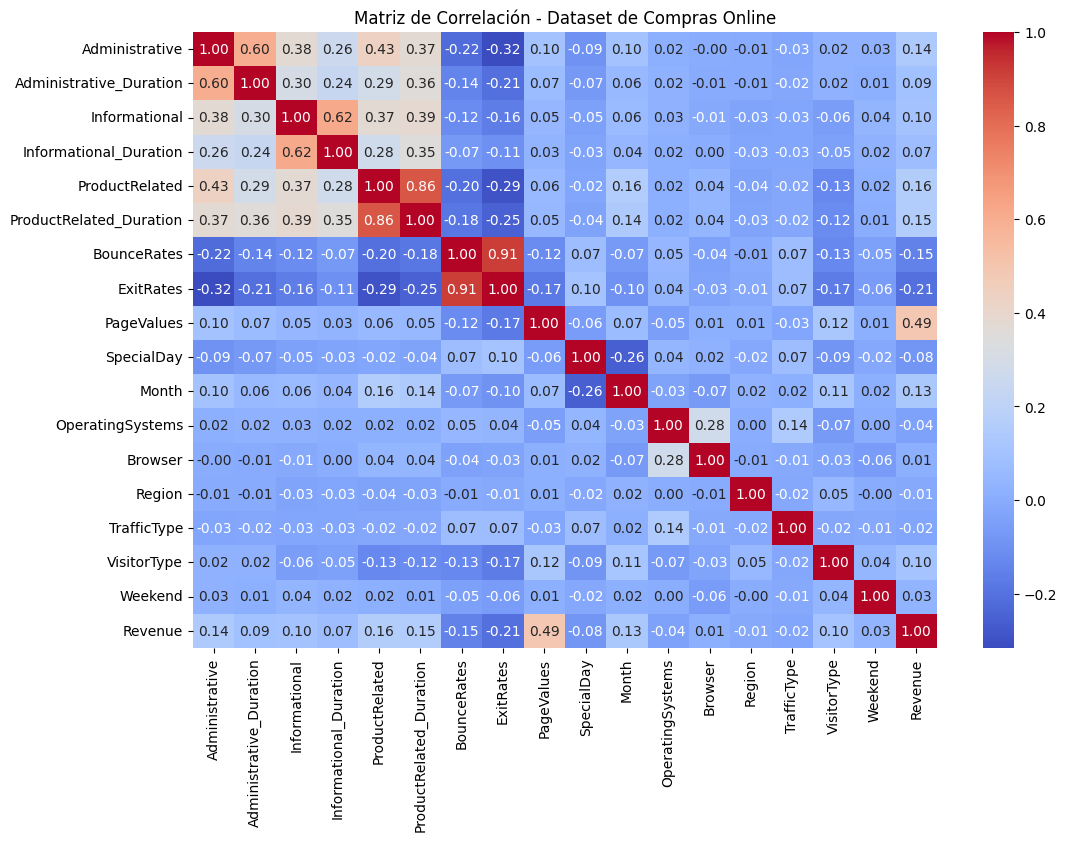

In [294]:
# analizamos que varibles son realmente utiles
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación - Dataset de Compras Online")
plt.show()

In [295]:
corr_with_target = df.corr()['Revenue'].sort_values(ascending=False)
print("Correlación con la variable Revenue:")
print(corr_with_target.to_frame())

Correlación con la variable Revenue:
                          Revenue
Revenue                  1.000000
PageValues               0.492569
ProductRelated           0.158538
ProductRelated_Duration  0.152373
Administrative           0.138917
Month                    0.127372
VisitorType              0.103843
Informational            0.095200
Administrative_Duration  0.093587
Informational_Duration   0.070345
Weekend                  0.029295
Browser                  0.011932
Region                  -0.011595
TrafficType             -0.023640
OperatingSystems        -0.039447
SpecialDay              -0.082305
BounceRates             -0.150673
ExitRates               -0.207071


Con la informacion que el heatmap nos presenta podemos justificar la eliminacion de ciertas columnas.
Como por ejemplo:
* Administrative ya que contiene informacion menos valiosa que Administrative_Duration. De manera que si administrative esta en cero sabemos que adminsitrative_duration tambien lo va a estar y en caso de que no sean cero, la informacion que vamos a usar va a estar en duration no en administrative. Lo mismo para Informational y para product related
* Columnas como OperatingSystems, Browser, Region, SpecialDay y TrafficType tienen muy baja correlación y no aportan informacion directa #####################Chequear con random Forest igual
* Bounce rates con Exit Rates

In [296]:
#analisis con random forest y regresion logistica sobre si es contraproducente o no eliminar esas columnas
sets = {
    "set_a": df.drop(columns=['Administrative', 'Informational', 'ProductRelated', 'ExitRates']),
    "set_b": df.drop(columns=['Administrative', 'Informational', 'ProductRelated', 'Region', 'TrafficType']),
    "set_c": df.drop(columns=['Administrative', 'Informational', 'ProductRelated', 'Browser', 'TrafficType']),
    "set_d": df.drop(columns=['Administrative', 'Informational', 'ProductRelated', 'Browser', 'TrafficType', 'Region', 'ExitRates']),
    "set_e": df.drop(columns=['Administrative', 'Informational', 'ProductRelated', 'Browser', 'TrafficType', 'Region', 'ExitRates', 'OperatingSystems'])
}

results = {}

In [ ]:
for name, dataset in sets.items():
    X = dataset.drop(columns='Revenue')
    y = dataset['Revenue']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42)

    rf_base = RandomForestClassifier(random_state=42)
    rf_base.fit(X_train, y_train)
    y_pred_rf = rf_base.predict(X_test)
    y_proba_rf = rf_base.predict_proba(X_test)[:, 1]
    rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
    rf_auc = roc_auc_score(y_test, y_proba_rf)

    param_dist = {
        'n_estimators': [100, 150, 200, 300],
        'max_depth': [None, 8, 10, 12, 16],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2'],
        'class_weight': [None, 'balanced']
    }
    rf_rs = RandomizedSearchCV(
        RandomForestClassifier(random_state=42),
        param_distributions=param_dist,
        n_iter=20, scoring='f1', cv=3, n_jobs=-1, random_state=42, verbose=0
    )
    rf_rs.fit(X_train, y_train)
    rf_best = rf_rs.best_estimator_
    y_pred_rft = rf_best.predict(X_test)
    y_proba_rft = rf_best.predict_proba(X_test)[:, 1]
    rft_report = classification_report(y_test, y_pred_rft, output_dict=True)
    rft_auc = roc_auc_score(y_test, y_proba_rft)

    pipe_lr = Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(max_iter=1000, random_state=42))
    ])
    pipe_lr.fit(X_train, y_train)
    y_pred_lr = pipe_lr.predict(X_test)
    y_proba_lr = pipe_lr.predict_proba(X_test)[:, 1]
    lr_report = classification_report(y_test, y_pred_lr, output_dict=True)
    lr_auc = roc_auc_score(y_test, y_proba_lr)

    results[name] = {
        "RF Base": {
            "precision": rf_report["1"]["precision"], "recall": rf_report["1"]["recall"],
            "f1-score": rf_report["1"]["f1-score"], "roc_auc": rf_auc
        },
        "RF Tuned": {
            "precision": rft_report["1"]["precision"], "recall": rft_report["1"]["recall"],
            "f1-score": rft_report["1"]["f1-score"], "roc_auc": rft_auc,
            "best_params": rf_rs.best_params_
        },
        "Logistic Regression": {
            "precision": lr_report["1"]["precision"], "recall": lr_report["1"]["recall"],
            "f1-score": lr_report["1"]["f1-score"], "roc_auc": lr_auc
        }
    }


results_df = pd.DataFrame({
    (model, metric): {k: v[model][metric] for k, v in results.items()}
    for model in ["RF Base", "RF RandomizedSearchCV", "Logistic Regression"]
    for metric in ["precision", "recall", "f1-score", "roc_auc"]
})

results_df

1️⃣ RF Base vs RF Tuned
En todos los set_*, el RF Tuned supera al RF Base en recall y F1, con un ROC AUC mayor.

RF Base tiene mayor precisión, pero a costa de perder compradores (bajo recall).

2️⃣ RF Tuned entre sets
F1-score (métrica más equilibrada para este caso desbalanceado):

set_a: 0.664

set_b: 0.656

set_c: 0.659

set_d: 0.664 (empatado con set_a)

set_e: 0.658

ROC AUC:

set_d y set_e son los más altos (0.9254 y 0.9259).

3️⃣ Logistic Regression
F1 es mucho más bajo (0.44–0.45) y recall pésimo (~0.32).

Aunque la precisión es alta (~0.73), es demasiado bajo el recall → deja escapar la mayoría de compradores.

✅ Conclusión: Elegir RF Tuned con set_d
Justificación:

Balance ideal:

F1 = 0.6635 (empatado como el mejor con set_a).

Recall = 0.7356 (mejor que set_a).

ROC AUC = 0.9254 (muy alto y cercano al máximo).

Dimensión de features:

set_d es más reducido que set_a (elimina más columnas poco relevantes).

Modelos más simples generalizan mejor y son más interpretables.

RF Tuned > RF Base: mejora el recall un 20–25% con F1 estable.

Logistic Regression queda descartado: bajo recall y F1.

📌 Qué usar
Modelo: Random Forest Tuned

Dataset: set_d

Hiperparámetros: los encontrados por el RandomizedSearchCV

Esto maximiza el recall (detectar compradores) sin sacrificar demasiado precisión y con el mejor balance de F1/ROC AUC.

Estas metricas representan:
* Precision: De los que predije como compra, cuantos realmente compraron?
* Recall: De todos los que realmente compraron, cuantos identifique?
* F1-score: Promedio balanceado entre precision y recall
* ROC AUC: que tan bien el modelo separa las clases 0 y 1

In [ ]:
columns_to_drop= ['Administrative', 'Informational', 'ProductRelated', 'Browser', 'TrafficType', 'Region', 'ExitRates']
df = df.drop(columns=columns_to_drop)

print("Columnas finales para el modelo:")
df.columns

Random Forest (mejor en general)
Tiene mayor recall (hasta ~56%) que la regresión logística (~32%) → eso significa que detecta más compradores reales, que es lo que más te importa si querés maximizar ventas o conversión.

Su F1-score es más alto (más de 0.61 en todos los sets).

ROC AUC > 0.91 → lo que indica una muy buena capacidad de discriminación entre compradores y no compradores.

El set_d es el mejor, con:

Precision: 0.698

Recall: 0.562

F1-score: 0.623

AUC: 0.913

⚠️ Regresión Logística (menos efectiva para este caso)
Tiene buena precisión (~0.73), pero muy bajo recall (~0.32): se pierde más del 65% de los compradores.

El F1-score es mucho más bajo (~0.45).

Aunque el AUC está bien (~0.87), Random Forest es claramente superior para este problema.

✅ ¿Esto es bueno?
Sí, para un dataset desbalanceado, donde solo ~15% de los usuarios compran, tener recall arriba del 55% y AUC > 0.91 con Random Forest es excelente. Significa que tu modelo:

No solo identifica bien a los compradores.

Sino que lo hace sin demasiados falsos positivos.


In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación - Dataset de Compras Online")
plt.show()

In [ ]:
corr_with_target = df.corr()['Revenue'].sort_values(ascending=False)
print("Correlación con la variable Revenue:")
print(corr_with_target.to_frame())

Browser, TrafficType, Region y OperatingSystems

### Modelado

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import pandas as pd

# --- Dataset elegido ---
df_final = sets["set_d"]
X, y = df_final.drop(columns="Revenue"), df_final["Revenue"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- Usar los mejores hiperparámetros encontrados ---
best_params = results["set_d"]["RF Tuned"]["best_params"].copy()
best_params.pop("max_samples", None)  # si quedó del RandomizedSearch

rf_final = RandomForestClassifier(
    n_estimators=200, random_state=42, **best_params
)
rf_final.fit(X_train, y_train)

# --- Evaluar ---
y_pred = rf_final.predict(X_test)
y_proba = rf_final.predict_proba(X_test)[:, 1]

print("\n=== Modelo final RF Tuned con set_d ===\n")
print(classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix [[TN, FP], [FN, TP]]:\n", confusion_matrix(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")

# --- Gráficos ---
fpr, tpr, _ = roc_curve(y_test, y_proba)
prec, rec, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC={roc_auc_score(y_test, y_proba):.3f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("Curva ROC - RF Tuned (set_d)"); plt.legend(); plt.show()

plt.figure(figsize=(7,5))
plt.plot(rec, prec)
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Curva Precision-Recall - RF Tuned (set_d)")
plt.show()

# Importancia de features
imp = pd.DataFrame({
    "feature": X.columns,
    "importance": rf_final.feature_importances_
}).sort_values("importance", ascending=False)

plt.figure(figsize=(8,5))
plt.barh(imp["feature"].head(10)[::-1], imp["importance"].head(10)[::-1])
plt.title("Top 10 Features - RF Tuned (set_d)")
plt.tight_layout(); plt.show()


In [193]:


results = {}
for name, dataset in sets.items():
    X = dataset.drop(columns='Revenue')
    y = dataset['Revenue']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42)

    # --- Random Forest (base) ---
    rf_base = RandomForestClassifier(random_state=42)
    rf_base.fit(X_train, y_train)
    y_pred_rf = rf_base.predict(X_test)
    y_proba_rf = rf_base.predict_proba(X_test)[:, 1]
    rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
    rf_auc = roc_auc_score(y_test, y_proba_rf)

    # --- Random Forest (RandomizedSearchCV) ---
    param_dist = {
        'n_estimators': [100, 150, 200, 300],
        'max_depth': [None, 8, 10, 12, 16],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2'],
        'class_weight': [None, 'balanced']
    }
    rf_rs = RandomizedSearchCV(
        RandomForestClassifier(random_state=42),
        param_distributions=param_dist,
        n_iter=20, scoring='f1', cv=3, n_jobs=-1, random_state=42, verbose=0
    )
    rf_rs.fit(X_train, y_train)
    rf_best = rf_rs.best_estimator_
    y_pred_rft = rf_best.predict(X_test)
    y_proba_rft = rf_best.predict_proba(X_test)[:, 1]
    rft_report = classification_report(y_test, y_pred_rft, output_dict=True)
    rft_auc = roc_auc_score(y_test, y_proba_rft)

    # --- Logistic Regression (con escalado) ---
    pipe_lr = Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(max_iter=1000, random_state=42))
    ])
    pipe_lr.fit(X_train, y_train)
    y_pred_lr = pipe_lr.predict(X_test)
    y_proba_lr = pipe_lr.predict_proba(X_test)[:, 1]
    lr_report = classification_report(y_test, y_pred_lr, output_dict=True)
    lr_auc = roc_auc_score(y_test, y_proba_lr)

    results[name] = {
        "RF Base": {
            "precision": rf_report["1"]["precision"], "recall": rf_report["1"]["recall"],
            "f1-score": rf_report["1"]["f1-score"], "roc_auc": rf_auc
        },
        "RF Tuned": {
            "precision": rft_report["1"]["precision"], "recall": rft_report["1"]["recall"],
            "f1-score": rft_report["1"]["f1-score"], "roc_auc": rft_auc,
            "best_params": rf_rs.best_params_
        },
        "Logistic Regression": {
            "precision": lr_report["1"]["precision"], "recall": lr_report["1"]["recall"],
            "f1-score": lr_report["1"]["f1-score"], "roc_auc": lr_auc
        }
    }

# Tabla comparativa (sin los best_params para que sea más legible)
results_df = pd.DataFrame({
    (model, metric): {k: v[model][metric] for k, v in results.items()}
    for model in ["RF Base", "RF Tuned", "Logistic Regression"]
    for metric in ["precision", "recall", "f1-score", "roc_auc"]
})

results_df
# Si querés ver los mejores parámetros por set:
# {k: v["RF Tuned"]["best_params"] for k, v in results.items()}


KeyboardInterrupt: 

                   precision  recall      f1  roc_auc
setup                                                
baseline              0.7267  0.5707  0.6393   0.9254
class_weight          0.5799  0.7696  0.6614   0.9231
oversample_50_50      0.5443  0.7880  0.6439   0.9248
undersample_60_40     0.5595  0.7880  0.6543   0.9241

baseline  CM [[TN, FP],[FN, TP]]:
[[2002   82]
 [ 164  218]]

class_weight  CM [[TN, FP],[FN, TP]]:
[[1871  213]
 [  88  294]]

oversample_50_50  CM [[TN, FP],[FN, TP]]:
[[1832  252]
 [  81  301]]

undersample_60_40  CM [[TN, FP],[FN, TP]]:
[[1847  237]
 [  81  301]]


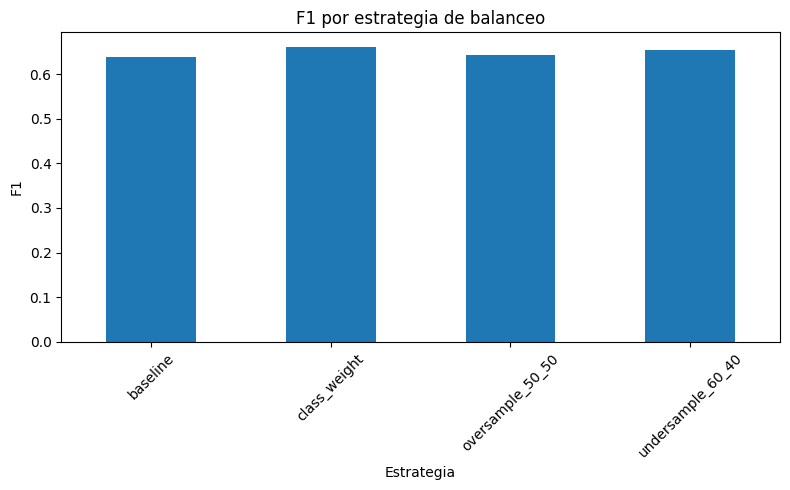

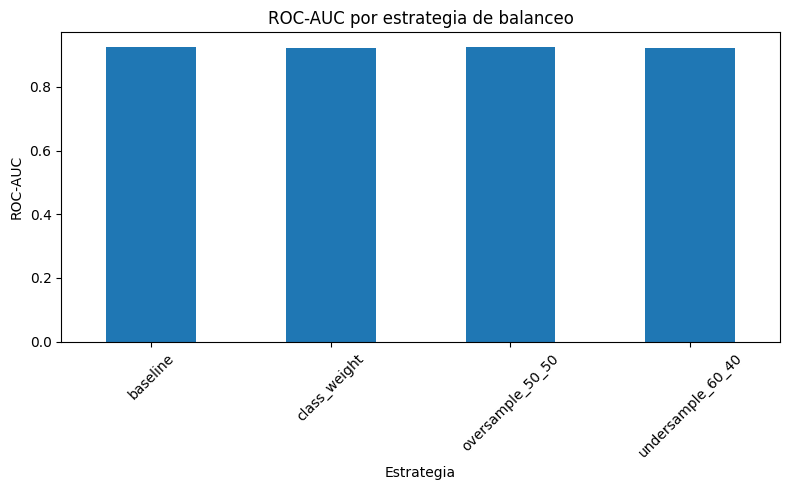

In [163]:
# ==== Balanceo del target: evaluación (sin imblearn) ====
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

# Split fijo (usamos el df ya reducido)
X, y = df.drop(columns='Revenue'), df['Revenue']
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

def eval_rf(label, Xtr, ytr):
    clf = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt', random_state=42)
    clf.fit(Xtr, ytr)
    yp = clf.predict(X_te); proba = clf.predict_proba(X_te)[:, 1]
    rep = classification_report(y_te, yp, output_dict=True)
    return [label, rep['1']['precision'], rep['1']['recall'], rep['1']['f1-score'], roc_auc_score(y_te, proba),
            confusion_matrix(y_te, yp)]

results = []

# 1) Baseline
results.append(eval_rf('baseline', X_tr, y_tr))

# 2) class_weight='balanced'
clf_w = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt',
                               class_weight='balanced', random_state=42)
clf_w.fit(X_tr, y_tr)
yp_w = clf_w.predict(X_te); proba_w = clf_w.predict_proba(X_te)[:, 1]
rep_w = classification_report(y_te, yp_w, output_dict=True)
results.append(['class_weight', rep_w['1']['precision'], rep_w['1']['recall'], rep_w['1']['f1-score'],
                roc_auc_score(y_te, proba_w), confusion_matrix(y_te, yp_w)])

# 3) Oversampling manual 50/50 (duplicar minoritaria en train)
train_df = X_tr.copy(); train_df['Revenue'] = y_tr.values
maj = train_df[train_df['Revenue']==0]; minr = train_df[train_df['Revenue']==1]
minr_up = minr.sample(n=len(maj), replace=True, random_state=42)
train_over = pd.concat([maj, minr_up]).sample(frac=1, random_state=42)
results.append(eval_rf('oversample_50_50', train_over.drop(columns='Revenue'), train_over['Revenue']))

# 4) Undersampling manual ~60/40 (recortar mayoritaria)
ratio = 0.6
maj_down_n = int(len(minr) * (ratio/(1-ratio)))
maj_down = maj.sample(n=min(maj_down_n, len(maj)), random_state=42)
train_under = pd.concat([maj_down, minr]).sample(frac=1, random_state=42)
results.append(eval_rf('undersample_60_40', train_under.drop(columns='Revenue'), train_under['Revenue']))

# ---- Resumen + gráficos ----
summary = pd.DataFrame(results, columns=['setup','precision','recall','f1','roc_auc','cm']).set_index('setup')
print(summary[['precision','recall','f1','roc_auc']].round(4))
for k, cm in summary['cm'].items():
    print(f"\n{k}  CM [[TN, FP],[FN, TP]]:\n{cm}")

# Gráfico F1
plt.figure(figsize=(8,5))
summary['f1'].plot(kind='bar')
plt.title('F1 por estrategia de balanceo'); plt.ylabel('F1'); plt.xlabel('Estrategia'); plt.xticks(rotation=45)
plt.tight_layout(); plt.show()

# Gráfico ROC-AUC
plt.figure(figsize=(8,5))
summary['roc_auc'].plot(kind='bar')
plt.title('ROC-AUC por estrategia de balanceo'); plt.ylabel('ROC-AUC'); plt.xlabel('Estrategia'); plt.xticks(rotation=45)
plt.tight_layout(); plt.show()


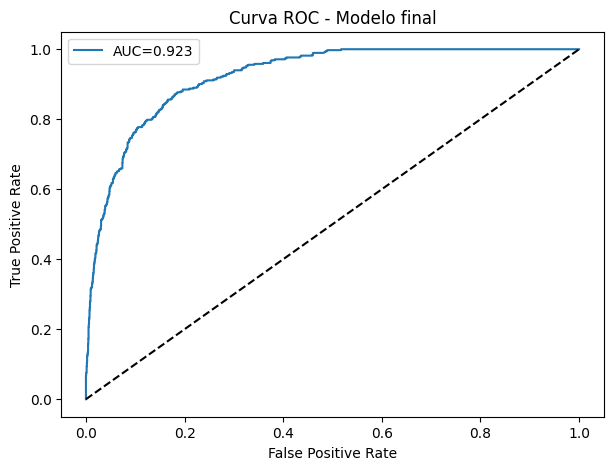

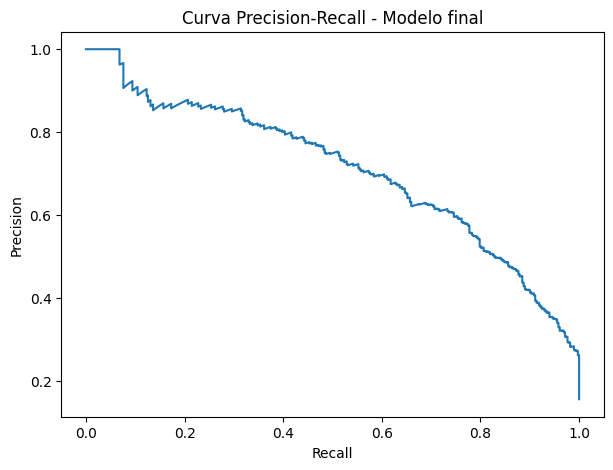

In [164]:
from sklearn.metrics import roc_curve, precision_recall_curve

# Modelo final con class_weight='balanced'
final_model = RandomForestClassifier(
    n_estimators=100, max_depth=10, max_features='sqrt',
    class_weight='balanced', random_state=42
)
final_model.fit(X_tr, y_tr)

# Probabilidades para curvas
y_proba = final_model.predict_proba(X_te)[:, 1]

# Curva ROC
fpr, tpr, _ = roc_curve(y_te, y_proba)
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC={roc_auc_score(y_te, y_proba):.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Modelo final")
plt.legend(); plt.show()

# Curva Precision-Recall
prec, rec, _ = precision_recall_curve(y_te, y_proba)
plt.figure(figsize=(7,5))
plt.plot(rec, prec)
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Curva Precision-Recall - Modelo final")
plt.show()


Vamos a probar optimizarlo con random Forest

In [106]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy=0.5, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.8, random_state=42)

X_train_resampled, y_train_resampled = Pipeline(steps=[('o', over), ('u', under)]).fit_resample(X_train, y_train)

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

def train_eval(label, model, Xtr, ytr, Xte, yte):
    model.fit(Xtr, ytr)
    yhat = model.predict(Xte)
    proba = model.predict_proba(Xte)[:, 1]
    rpt = classification_report(yte, yhat, output_dict=True)
    auc = roc_auc_score(yte, proba)
    cm = confusion_matrix(yte, yhat)
    return {
        "setup": label,
        "precision": rpt["1"]["precision"],
        "recall": rpt["1"]["recall"],
        "f1": rpt["1"]["f1-score"],
        "roc_auc": auc,
        "cm": cm
    }

# ==============================
# 3) Modelos y balanceos
# ==============================
results = []

# A) Baseline (sin balancear)
rf_base = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt', random_state=42)
results.append(train_eval("RF baseline (sin balanceo)", rf_base, X_train, y_train, X_test, y_test))

# B) class_weight='balanced'
rf_w = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt',
                              class_weight='balanced', random_state=42)
results.append(train_eval("RF con class_weight='balanced'", rf_w, X_train, y_train, X_test, y_test))

# C) Oversampling manual 50/50 (duplicar minoritaria en el train)
train_df = X_train.copy()
train_df["Revenue"] = y_train.values
maj = train_df[train_df["Revenue"] == 0]
minr = train_df[train_df["Revenue"] == 1]

minr_up = minr.sample(n=len(maj), replace=True, random_state=42)  # igualamos cantidades
train_bal = pd.concat([maj, minr_up]).sample(frac=1, random_state=42)
Xtr_over = train_bal.drop(columns="Revenue")
ytr_over = train_bal["Revenue"]

rf_over = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt', random_state=42)
results.append(train_eval("RF con oversampling manual 50/50", rf_over, Xtr_over, ytr_over, X_test, y_test))

# D) (Opcional) Undersampling manual ~60/40 (recortar mayoritaria)
target_ratio = 0.6  # proporción objetivo de clase 0 frente a 1 en el train
maj_down_n = int(len(minr) * (target_ratio / (1 - target_ratio)))
maj_down = maj.sample(n=min(maj_down_n, len(maj)), random_state=42)
train_under = pd.concat([maj_down, minr]).sample(frac=1, random_state=42)
Xtr_under = train_under.drop(columns="Revenue")
ytr_under = train_under["Revenue"]

rf_under = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt', random_state=42)
results.append(train_eval("RF con undersampling manual ~60/40", rf_under, Xtr_under, ytr_under, X_test, y_test))

# ==============================
# 4) Resumen
# ==============================
summary = pd.DataFrame([{k: v for k, v in r.items() if k != "cm"} for r in results]).set_index("setup")
print(summary.round(4))

print("\nMATRICES DE CONFUSIÓN (orden [[TN, FP],[FN, TP]])")
for r in results:
    print(f"\n{r['setup']}:\n{r['cm']}")


                                    precision  recall      f1  roc_auc
setup                                                                 
RF baseline (sin balanceo)             0.7399  0.5733  0.6460   0.9258
RF con class_weight='balanced'         0.5748  0.7644  0.6562   0.9251
RF con oversampling manual 50/50       0.5497  0.7958  0.6503   0.9275
RF con undersampling manual ~60/40     0.5695  0.7723  0.6556   0.9252

MATRICES DE CONFUSIÓN (orden [[TN, FP],[FN, TP]])

RF baseline (sin balanceo):
[[2007   77]
 [ 163  219]]

RF con class_weight='balanced':
[[1868  216]
 [  90  292]]

RF con oversampling manual 50/50:
[[1835  249]
 [  78  304]]

RF con undersampling manual ~60/40:
[[1861  223]
 [  87  295]]



| **F1-score**  | `0.639` | Equilibrio entre precisión y recall (mejoró frente a los anteriores). Muy relevante para el target desbalanceado.   

| **Precision** | `0.727` | De todos los que predijo como compradores, el 72.7% realmente lo eran.    
                                          |
| **Recall**    | `0.571` | Detecta al 57% de los compradores reales. Es decir, mejora la capacidad de captura de compradores.                
  
| **ROC AUC**   | `0.925` | Excelente capacidad de distinguir entre compradores y no compradores. Está por encima de 0.9, lo cual es muy bueno. |


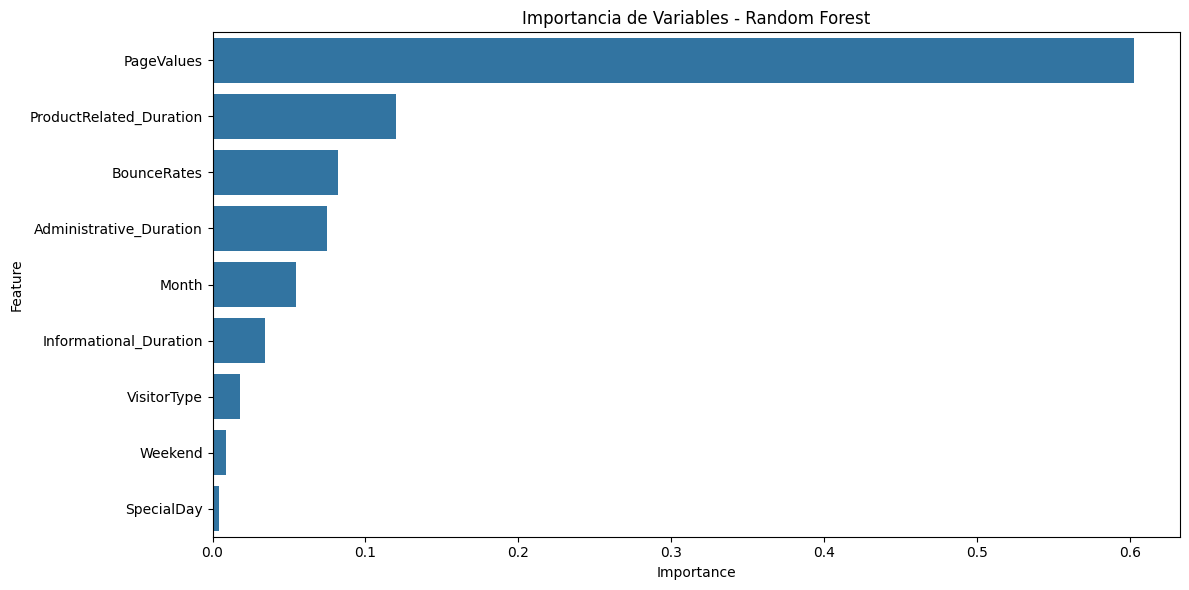

In [192]:
rf_best = RandomForestClassifier(
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)
rf_best.fit(X_train, y_train)
importances = rf_best.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Mostrar gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Importancia de Variables - Random Forest")
plt.tight_layout()
plt.show()

Con este grafico podemos sugerir de realizar un modelo aun mas simple, eliminando varias columnas

Ahora probamos lo mismo aplicando SMOTE y RandomUnderSampler

### Visualizaciones
histogramas, boxplots, heatmaps

array([[<Axes: title={'center': 'Administrative_Duration'}>,
        <Axes: title={'center': 'Informational_Duration'}>,
        <Axes: title={'center': 'ProductRelated_Duration'}>],
       [<Axes: title={'center': 'BounceRates'}>,
        <Axes: title={'center': 'PageValues'}>,
        <Axes: title={'center': 'SpecialDay'}>],
       [<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'OperatingSystems'}>,
        <Axes: title={'center': 'VisitorType'}>],
       [<Axes: title={'center': 'Weekend'}>,
        <Axes: title={'center': 'Revenue'}>, <Axes: >]], dtype=object)

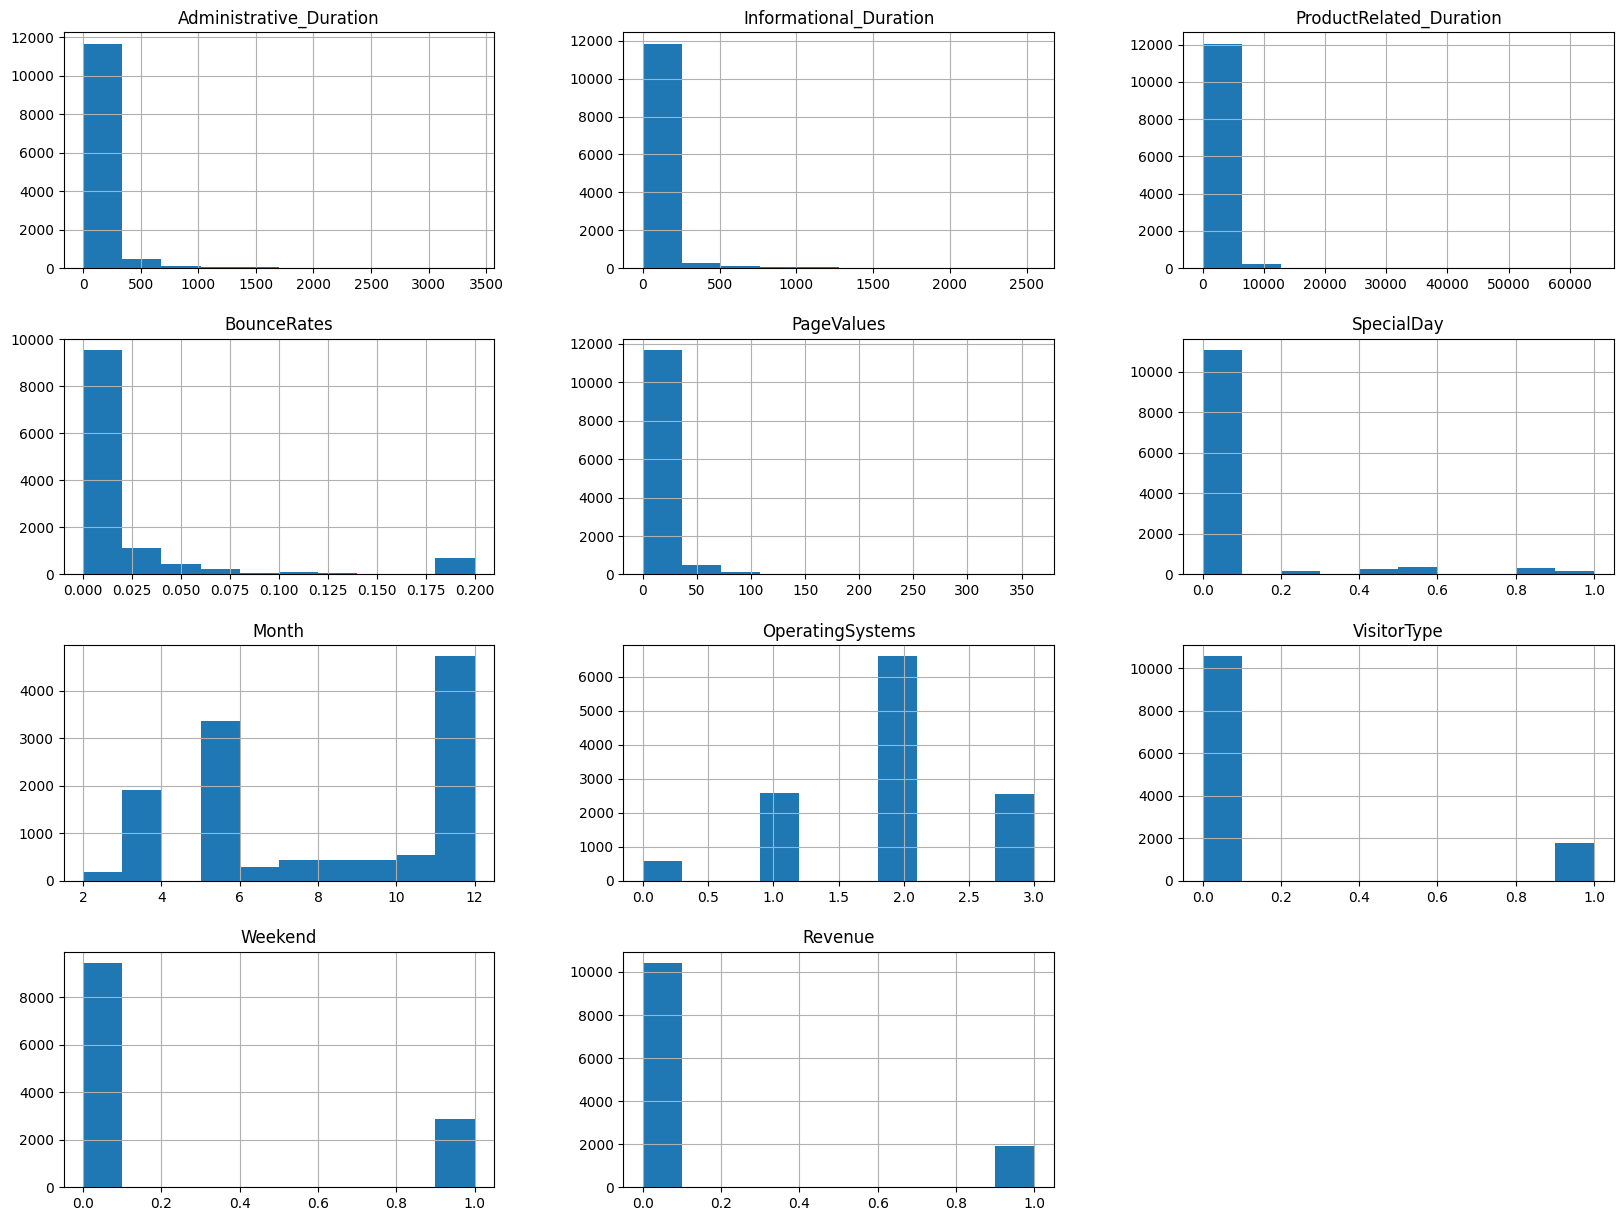

In [ ]:
df.hist(figsize=(20,15))